In [143]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import  StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [20]:
cd = pd.read_excel("D://assignments//assignment 7//EastWestAirlines.xlsx",sheet_name='data')
print(cd.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [21]:
cd.shape

(3999, 12)

In [23]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [26]:
cd.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [30]:
cd[cd.duplicated()].shape

(0, 12)

In [211]:
cd1=cd.drop(['ID#', 'Award?'], axis = 1)
cd1.head()
cdH=cd1
cdKm=cd1
cdDb=cd1

# HIERARCHICAL CLUSTERING

In [75]:
scaler = StandardScaler()
X = scaler.fit_transform(cdH)

In [76]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

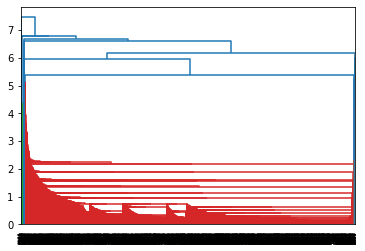

In [180]:
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

In [203]:
hc = AgglomerativeClustering(n_clusters=8, affinity = 'euclidean', linkage = 'single')

In [204]:
y_hc = hc.fit_predict(X)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [205]:
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [206]:
cdH['h_clusterid'] = Clusters

In [209]:
cdH=cdKm.drop(['clusterid_new'],axis=1)

In [210]:
cdH

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid,clusterid_K
0,28143,0,1,1,1,174,1,0,0,7000,0,3
1,19244,0,1,1,1,215,2,0,0,6968,0,3
2,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,14776,0,1,1,1,500,1,0,0,6952,0,3
4,97752,0,4,1,1,43300,26,2077,4,6935,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


# K Means

In [147]:
scaler = StandardScaler()
K = scaler.fit_transform(cdKm)

In [148]:
K

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -3.16425594e-02],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -3.16425594e-02],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -3.16425594e-02],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00, -3.16425594e-02],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -3.16425594e-02],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -3.16425594e-02]])

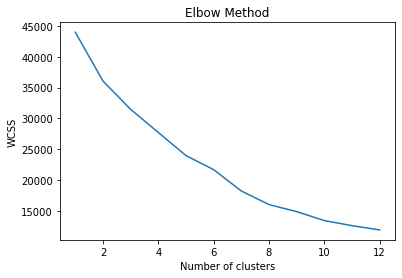

In [231]:
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(K)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 13), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [233]:
clusters_K = KMeans(8, random_state=40)
clusters_K.fit_predict(K)

array([2, 2, 2, ..., 0, 0, 0])

In [234]:
cdKm['clusterid_K'] = clusters_K.labels_

In [235]:
clusters_K.cluster_centers_

array([[-3.78201627e-01, -1.38204497e-01, -5.80451438e-01,
        -9.82418871e-02, -6.27665798e-02, -5.11579521e-01,
        -4.87735457e-01, -2.01054841e-01, -2.17996620e-01,
        -9.46577967e-01, -3.16425594e-02],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01, -3.16425594e-02],
       [-1.75393875e-01, -1.08370103e-01, -5.93665567e-01,
        -9.82418871e-02, -5.83199466e-02, -5.03936806e-01,
        -4.42623225e-01, -1.47203286e-01, -1.52975692e-01,
         7.93907511e-01, -3.16425594e-02],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
         6.17851143e-01,  8.75493989e-02,  2.20346809e-01,
        -7.24639805e-02, -3.16425594e-02],
       [ 7.98633959e-01,  3.72552436e-01,  1.38358827e-01,
        -9.82418871e-02, -6.27665798e-02,  6.65577170e-01,
  

In [239]:
cdKm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid,clusterid_K
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


# DBSCAN

In [212]:
scaler = StandardScaler()
Db = scaler.fit_transform(cdDb)

In [213]:
dbscan = DBSCAN(eps=0.6, min_samples=12)
dbscan.fit(Db)

DBSCAN(eps=0.6, min_samples=12)

In [214]:
dbscan.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int64)

In [222]:
cl=pd.DataFrame(dbscan.labels_,columns=['clusterDb'])

In [224]:
cl

,clusterDb
0,0
1,0
2,0
3,0
4,-1
...,...
3994,0
3995,0
3996,3
3997,0


In [225]:
pd.concat([cdDb,cl],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid,clusterDb
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [228]:
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise_ = list(dbscan.labels_).count(-1)

In [229]:
n_clusters_

5

In [230]:
n_noise_

1229